
# Punto 2 — EDA Funcional de Ventas (100 tiendas × 24 meses)

**Objetivo:** Explorar la estructura, calidad y patrones de las series mensuales de ventas para 100 tiendas durante 24 meses, preparando la base para una **clusterización funcional** y la posterior **estimación de la curva de la Tienda_101**.

**Archivos base:**
- `/mnt/data/Punto2.ventas_funcionales.csv` (crudo)
- `data/clean/ventas_funcionales_clean.csv` (copia estándar; *no se requirió limpieza*)


In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option("display.float_format", lambda x: f"{x:,.2f}")
df = pd.read_csv("../data/raw/Punto2.ventas_funcionales.csv")
df.head()


,Periodo,Tienda_1,Tienda_2,Tienda_3,Tienda_4,Tienda_5,Tienda_6,Tienda_7,Tienda_8,Tienda_9,Tienda_10,Tienda_11,Tienda_12,Tienda_13,Tienda_14,Tienda_15,Tienda_16,Tienda_17,Tienda_18,Tienda_19,Tienda_20,Tienda_21,Tienda_22,Tienda_23,Tienda_24,Tienda_25,Tienda_26,Tienda_27,Tienda_28,Tienda_29,Tienda_30,Tienda_31,Tienda_32,Tienda_33,Tienda_34,Tienda_35,Tienda_36,Tienda_37,Tienda_38,Tienda_39,Tienda_40,Tienda_41,Tienda_42,Tienda_43,Tienda_44,Tienda_45,Tienda_46,Tienda_47,Tienda_48,Tienda_49,Tienda_50,Tienda_51,Tienda_52,Tienda_53,Tienda_54,Tienda_55,Tienda_56,Tienda_57,Tienda_58,Tienda_59,Tienda_60,Tienda_61,Tienda_62,Tienda_63,Tienda_64,Tienda_65,Tienda_66,Tienda_67,Tienda_68,Tienda_69,Tienda_70,Tienda_71,Tienda_72,Tienda_73,Tienda_74,Tienda_75,Tienda_76,Tienda_77,Tienda_78,Tienda_79,Tienda_80,Tienda_81,Tienda_82,Tienda_83,Tienda_84,Tienda_85,Tienda_86,Tienda_87,Tienda_88,Tienda_89,Tienda_90,Tienda_91,Tienda_92,Tienda_93,Tienda_94,Tienda_95,Tienda_96,Tienda_97,Tienda_98,Tienda_99,Tienda_100
0,1,371.56,447.25,828.31,211.31,989.85,"1,130.51",587.35,193.13,903.74,973.51,"1,317.79","1,420.21",729.82,691.22,478.61,432.71,539.98,869.90,715.06,291.22,896.00,614.28,363.00,233.67,409.98,668.23,366.49,446.44,632.23,906.07,749.48,468.45,189.24,941.85,"1,941.14",583.19,736.72,504.41,486.17,801.03,"2,653.37",819.71,"3,201.32","1,853.47",306.73,524.55,810.52,"1,061.01","1,559.98",324.81,802.47,558.42,"1,156.04","1,323.23",107.41,453.44,354.58,667.16,952.32,582.49,426.94,280.43,612.87,684.46,452.34,697.45,615.42,225.64,837.05,"1,368.29","1,693.29",724.75,821.81,957.21,797.60,244.58,944.99,358.78,447.59,802.46,"1,540.92","1,035.97",258.64,"1,024.08","1,104.05",853.99,493.50,"1,013.73","1,310.04","1,074.91",558.98,588.05,931.26,475.00,919.62,525.94,729.53,"1,383.45","3,607.81",771.14
1,2,522.07,530.93,904.22,221.84,"1,062.30","1,191.00",607.17,210.44,"1,138.63","1,137.24","1,424.13","1,581.51",763.01,801.98,568.40,603.34,578.63,990.50,834.64,415.15,843.08,639.01,365.65,272.67,654.34,918.55,431.15,427.54,766.15,"1,009.70",942.68,415.64,193.22,"1,078.95","1,998.06",662.49,820.97,507.77,533.96,898.19,"2,996.26",718.12,"3,367.40","2,105.24",375.03,533.68,768.15,"1,272.15","1,707.32",379.27,749.87,642.18,"1,330.42","1,268.65",170.35,509.42,480.66,740.86,"1,107.49",715.96,571.32,354.69,653.81,830.79,544.58,691.82,691.23,328.85,"1,052.18","1,535.96","1,827.40",911.64,959.62,"1,136.55",860.76,262.59,"1,089.41",397.22,465.27,870.16,"1,561.40","1,106.95",248.72,956.94,"1,114.71",786.02,475.41,"1,256.49","1,267.54","1,106.00",625.64,785.93,954.06,427.60,980.16,606.15,891.86,"1,388.16","3,677.75",784.57
2,3,521.88,678.06,"1,089.59",241.28,"1,066.98","1,184.48",643.09,230.03,999.55,"1,334.42","1,395.42","1,617.62",813.69,736.43,612.56,513.88,772.16,958.36,955.07,414.70,"1,173.60",748.40,369.83,305.05,662.53,"1,153.22",415.73,463.49,844.40,"1,280.23","1,042.35",594.52,257.25,"1,205.75","2,365.94",808.06,876.88,538.78,611.07,835.60,"3,118.16",916.40,"3,828.22","2,173.64",352.55,499.23,831.26,"1,413.48","1,752.48",458.29,935.33,692.04,"1,419.59","1,411.15",152.21,555.44,430.24,790.75,"1,121.33",816.41,554.59,471.68,768.91,"1,001.11",513.94,814.37,673.45,381.70,"1,012.60","1,508.06","1,956.48",903.09,964.08,982.57,"1,061.31",312.55,"1,073.51",399.48,544.44,"1,082.52","1,728.57","1,552.02",257.32,"1,009.13","1,458.84",827.42,615.68,"1,135.24","1,344.78","1,191.43",896.02,716.27,"1,059.19",562.63,"1,095.07",662.40,"1,089.25","1,661.04","4,408.70",816.53
3,4,538.89,689.72,"1,255.47",264.90,"1,293.89","1,421.94",700.39,246.32,"1,187.08","1,606.51","1,496.38","1,785.39",892.99,861.55,656.08,606.78,852.95,"1,023.23","1,052.75",462.62,"1,429.87",811.19,445.76,315.59,746.43,"1,049.91",500.85,547.83,896.84,"1,385.08","1,109.88",655.17,320.50,"1,169.42","2,292.28",838.75,887.42,535.97,694.75,"1,028.72","3,273.08",911.67,"4,214.76","2,410.69",442.79,684.61,861.76,"1,448.56","1,974.54",410.84,"1,073.21",851.51,"1,519.03","1,502.49",188.06,627.61,458.30,892.28,"1,336.83","1,015

## 1. Estructura e Información General

In [41]:

print("Shape:", df.shape)
display(df.dtypes.to_frame("dtype").T)
display(df.describe().T.head())


Shape: (24, 101)


,Periodo,Tienda_1,Tienda_2,Tienda_3,Tienda_4,Tienda_5,Tienda_6,Tienda_7,Tienda_8,Tienda_9,Tienda_10,Tienda_11,Tienda_12,Tienda_13,Tienda_14,Tienda_15,Tienda_16,Tienda_17,Tienda_18,Tienda_19,Tienda_20,Tienda_21,Tienda_22,Tienda_23,Tienda_24,Tienda_25,Tienda_26,Tienda_27,Tienda_28,Tienda_29,Tienda_30,Tienda_31,Tienda_32,Tienda_33,Tienda_34,Tienda_35,Tienda_36,Tienda_37,Tienda_38,Tienda_39,Tienda_40,Tienda_41,Tienda_42,Tienda_43,Tienda_44,Tienda_45,Tienda_46,Tienda_47,Tienda_48,Tienda_49,Tienda_50,Tienda_51,Tienda_52,Tienda_53,Tienda_54,Tienda_55,Tienda_56,Tienda_57,Tienda_58,Tienda_59,Tienda_60,Tienda_61,Tienda_62,Tienda_63,Tienda_64,Tienda_65,Tienda_66,Tienda_67,Tienda_68,Tienda_69,Tienda_70,Tienda_71,Tienda_72,Tienda_73,Tienda_74,Tienda_75,Tienda_76,Tienda_77,Tienda_78,Tienda_79,Tienda_80,Tienda_81,Tienda_82,Tienda_83,Tienda_84,Tienda_85,Tienda_86,Tienda_87,Tienda_88,Tienda_89,Tienda_90,Tienda_91,Tienda_92,Tienda_93,Tienda_94,Tienda_95,Tienda_96,Tienda_97,Tienda_98,Tienda_99,Tienda_100
dtype,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64


,count,mean,std,min,25%,50%,75%,max
Periodo,24.00,12.50,7.07,1.00,6.75,12.50,18.25,24.00
Tienda_1,24.00,"1,172.07",449.28,371.56,815.38,"1,183.86","1,495.16","1,969.64"
Tienda_2,24.00,"1,082.10",346.90,447.25,789.29,"1,074.20","1,309.13","1,629.75"
Tienda_3,24.00,"1,923.15",617.19,828.31,"1,474.64","2,024.17","2,402.92","3,157.33"
Tienda_4,24.00,376.28,99.34,211.31,306.11,366.77,463.06,527.41


## 2. Calidad de Datos

In [42]:

quality = {}
quality["total_nulls"] = int(df.isna().sum().sum())
quality["cols_with_null"] = int((df.isna().sum()>0).sum())
quality["total_negatives"] = int((df.drop(columns=["Periodo"])<0).sum().sum())
quality["total_zeros"] = int((df.drop(columns=["Periodo"])==0).sum().sum())
quality["period_is_sequential"] = bool((df["Periodo"].diff().dropna()==1).all())
quality


{'total_nulls': 0,
 'cols_with_null': 0,
 'total_negatives': 0,
 'total_zeros': 0,
 'period_is_sequential': True}


**Conclusión de calidad:** No se encontraron valores nulos, negativos ni ceros; los periodos están correctamente secuenciales. **No se requiere limpieza.** Se genera una copia estándar en `data/clean/ventas_funcionales_clean.csv` para trazabilidad.


## 3. Estadísticas Descriptivas por Tienda

In [43]:

stats = df.drop(columns=["Periodo"]).describe().T
stats["cv"] = stats["std"] / stats["mean"]
stats.sort_values("mean", ascending=False).head(10)


,count,mean,std,min,25%,50%,75%,max,cv
Tienda_43,24.00,"7,167.92","2,512.06","3,201.32","5,182.55","7,264.35","9,021.71","10,946.01",0.35
Tienda_99,24.00,"6,210.01","1,534.66","3,607.81","5,053.59","6,243.93","7,683.41","8,487.97",0.25
Tienda_41,24.00,"4,598.70","1,202.41","2,653.37","3,603.73","4,685.48","5,395.29","6,778.57",0.26
Tienda_44,24.00,"4,043.65","1,425.70","1,853.47","2,973.87","3,867.31","5,327.46","6,602.17",0.35
Tienda_35,24.00,"3,389.75",938.46,"1,941.14","2,566.37","3,485.06","4,123.92","5,023.90",0.28
Tienda_49,24.00,"3,300.06","1,184.32","1,559.98","2,243.61","3,086.04","4,446.37","5,195.68",0.36
Tienda_85,24.00,"3,230.57","1,355.83","1,104.05","2,059.64","3,154.90","4,378.79","5,558.74",0.42
Tienda_10,24.00,"2,935.40","1,263.71",973.51,"1,936.57","2,992.19","3,901.89","4,942.47",0.43
Tienda_98,24.00,"2,893.52",946.51,"1,383.45","2,172.80","2,943.70","3,624.47","4,540.23",0.33
Tienda_74,24.00,"2,884.11","1,195.40",957.21,"1,988.02","2,954.68","3,661.55","5,611.35",0.41


In [50]:

# Top 10 por variabilidad (desviación estándar)
stats.sort_values("std", ascending=False).head(20)


,count,mean,std,min,25%,50%,75%,max,cv
Tienda_43,24.00,"7,167.92","2,512.06","3,201.32","5,182.55","7,264.35","9,021.71","10,946.01",0.35
Tienda_99,24.00,"6,210.01","1,534.66","3,607.81","5,053.59","6,243.93","7,683.41","8,487.97",0.25
Tienda_44,24.00,"4,043.65","1,425.70","1,853.47","2,973.87","3,867.31","5,327.46","6,602.17",0.35
Tienda_85,24.00,"3,230.57","1,355.83","1,104.05","2,059.64","3,154.90","4,378.79","5,558.74",0.42
Tienda_10,24.00,"2,935.40","1,263.71",973.51,"1,936.57","2,992.19","3,901.89","4,942.47",0.43
Tienda_41,24.00,"4,598.70","1,202.41","2,653.37","3,603.73","4,685.48","5,395.29","6,778.57",0.26
Tienda_74,24.00,"2,884.11","1,195.40",957.21,"1,988.02","2,954.68","3,661.55","5,611.35",0.41
Tienda_49,24.00,"3,300.06","1,184.32","1,559.98","2,243.61","3,086.04","4,446.37","5,195.68",0.36
Tienda_30,24.00,"2,737.57","1,140.94",906.07,"1,893.44","2,624.47","3,566.17","4,815.51",0.42
Tienda_26,24.00,"2,458.87","1,058.67",668.23,"1,562.71","2,663.57","3,078.63","4,168.06",0.43


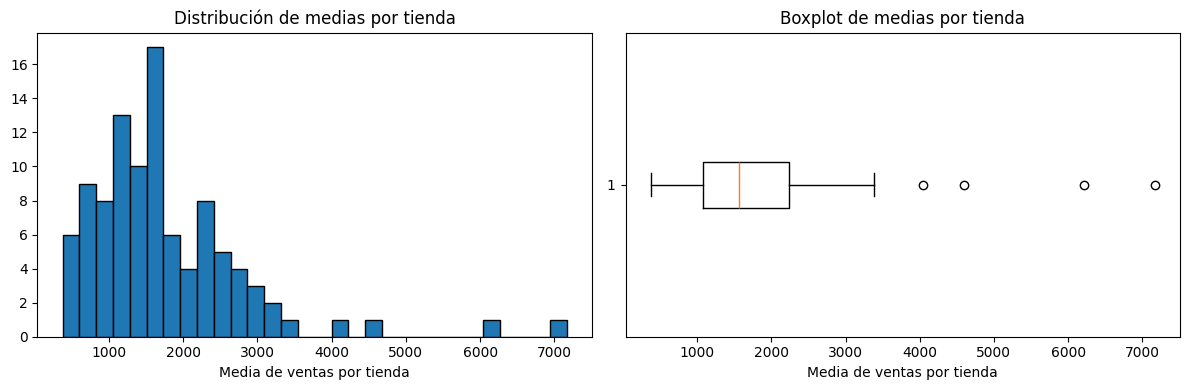

In [49]:
# Distribución de medias (histograma y boxplot)
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Histograma
axs[0].hist(stats["mean"], bins=30, edgecolor="black")
axs[0].set_title("Distribución de medias por tienda")
axs[0].set_xlabel("Media de ventas por tienda")

# Boxplot
axs[1].boxplot(stats["mean"], vert=False)
axs[1].set_title("Boxplot de medias por tienda")
axs[1].set_xlabel("Media de ventas por tienda")

plt.tight_layout()
plt.show()


### Análisis de resultados iniciales sobre estadisticas descriptivas

- **Distribución de medias por tienda**: la mayoría cae entre ~1.000 y 2.500; hay cola derecha marcada con pocas tiendas muy grandes (Tienda_43 ~7.168, Tienda_99 ~6.210, Tienda_41 ~4.599, Tienda_44 ~4.044). El boxplot muestra una mediana alrededor de ~1.6–1.8k y varios outliers a la derecha.
- Al igual que el EDA del punto 1, nos encontramos con **Outliers** (posiblemente estructurales si tienen relacion): las mismas (43, 99, 41, 44) aparecen como atípicas por nivel y por dispersión.
- Veo una variablidad **moderada o alta** esto lo exploraremos más adelante, es normal si hablamos de que pueden haber estacionalidades.

Asi viendo esto se puede sugerir 3-4 clusteres de primer vistazo. Los comportamientos **normales**, los comportamientos un poco **medios-altos** y podriamos ver comportamientos **hiper**.

## 4. Distribución Global e Outliers Estructurales

In [51]:

all_sales = df.drop(columns=["Periodo"]).values.flatten()
pd.Series(all_sales).describe()


count    2,400.00
mean     1,755.62
std      1,258.33
min        107.41
25%        932.99
50%      1,466.88
75%      2,212.44
max     10,946.01
dtype: float64

No distinguimos por ahora entre tiendas individuales

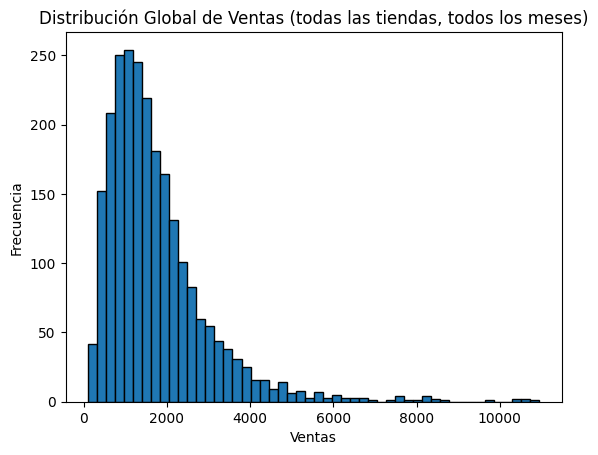

In [52]:

plt.hist(all_sales, bins=50, edgecolor="black")
plt.title("Distribución Global de Ventas (todas las tiendas, todos los meses)")
plt.xlabel("Ventas"); plt.ylabel("Frecuencia"); plt.show()


In [53]:

# Detectar outliers por media usando umbral robusto
mu_means = stats["mean"].mean()
sd_means = stats["mean"].std()
outlier_shops = stats[stats["mean"] > mu_means + 2*sd_means].index.tolist()
outlier_shops


['Tienda_41', 'Tienda_43', 'Tienda_44', 'Tienda_99']

**Tiendas outlier por magnitud** (Estas son las tiendas que encontramos como hyper o altas). Podrian considerarse como **segmento aparte** o manejarse con métricas de similitud robustas en el clustering.


## 5. Tendencias Temporales Globales

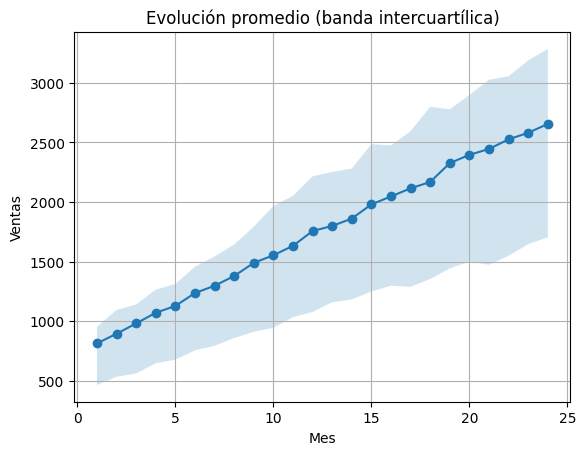

In [54]:

series_mean = df.drop(columns=["Periodo"]).mean(axis=1)
series_q25 = df.drop(columns=["Periodo"]).quantile(0.25, axis=1)
series_q75 = df.drop(columns=["Periodo"]).quantile(0.75, axis=1)

plt.plot(df["Periodo"], series_mean, marker="o")
plt.fill_between(df["Periodo"], series_q25, series_q75, alpha=0.2)
plt.title("Evolución promedio (banda intercuartílica)")
plt.xlabel("Mes"); plt.ylabel("Ventas"); plt.grid(True); plt.show()


Continuamos sin distiguir por tiendas, para revisar el comportamiento de las tiendas. ¿Que podemos notas acar?

- La **curva** promedio es **creciente**: en general, las tiendas aumentan sus ventas con el tiempo.
- La **banda intercuartílica** se va ensanchando con el tiempo: aEn los primeros meses (mes 1–5) hay menos dispersión entre tiendas, pero cuando la tienda ya tiene una cierta madurez en el mes 20–24 la brecha entre las más bajas (Q25) y las más altas (Q75) es mucho mayor.

No parece que vaya a existir un cluster con tendencia negativa.

## 6. Crecimientos y Forma de Curvas

Empezaremos a revisar el comportamiento individual de las tiendas.

In [55]:

# Crecimiento porcentual promedio por tienda
growth = df.drop(columns=["Periodo"]).pct_change().mean()
growth.sort_values(ascending=False).head(10)


Tienda_55   0.11
Tienda_26   0.10
Tienda_68   0.09
Tienda_74   0.09
Tienda_76   0.09
Tienda_62   0.09
Tienda_61   0.09
Tienda_25   0.09
Tienda_57   0.09
Tienda_33   0.09
dtype: float64

In [56]:

# Correlación 'mes vs ventas' por tienda como proxy de tendencia
t = df["Periodo"].values
corrs = {}
for col in df.columns:
    if col=="Periodo": continue
    corrs[col] = np.corrcoef(t, df[col].values)[0,1]
corrs = pd.Series(corrs).sort_values(ascending=False)
corrs.head(10), corrs.tail(10)


(Tienda_27   0.99
 Tienda_25   0.99
 Tienda_17   0.99
 Tienda_77   0.99
 Tienda_70   0.99
 Tienda_14   0.99
 Tienda_69   0.99
 Tienda_63   0.99
 Tienda_71   0.99
 Tienda_13   0.99
 dtype: float64,
 Tienda_42   0.96
 Tienda_23   0.96
 Tienda_9    0.95
 Tienda_52   0.95
 Tienda_44   0.95
 Tienda_21   0.95
 Tienda_55   0.95
 Tienda_72   0.95
 Tienda_74   0.94
 Tienda_76   0.94
 dtype: float64)

## 7. Curvas de Tiendas Outliers vs. Típicas

In [ ]:

to_plot = (outlier_shops[:4] if len(outlier_shops)>=4 else outlier_shops) + stats.sort_values("mean").head(4).index.tolist()
for c in to_plot:
    plt.plot(df["Periodo"], df[c], label=c)
plt.title("Comparación de curvas (outliers vs típicas)")
plt.xlabel("Mes"); plt.ylabel("Ventas"); plt.legend(); plt.grid(True); plt.show()



## 8. Preparación de Datos para Clusterización (no ejecuta el clustering aún)

Para comparar **formas de curva** más que magnitudes absolutas, se proponen tres vistas:

1. **Escala original**: útil para segmentar por nivel de ventas (identifica hiper/premium).
2. **Estandarización por tienda (z-score por columna)**: centra y escala cada serie → compara formas.
3. **Normalización por media de tienda**: divide cada valor por la media de su tienda → quita efecto de nivel.

A continuación se generan vistas 2 y 3 para el siguiente notebook de clustering.


In [ ]:

# 2) Z-score por tienda
df_z = df.copy()
for c in df.columns:
    if c=="Periodo": continue
    mu, sd = df[c].mean(), df[c].std(ddof=0)
    df_z[c] = (df[c]-mu)/sd

# 3) Normalización por media
df_norm = df.copy()
for c in df.columns:
    if c=="Periodo": continue
    mu = df[c].mean()
    df_norm[c] = df[c]/mu

# Guardado para el notebook de clusterización
df.to_csv("data/clean/ventas_funcionales_clean.csv", index=False)
df_z.to_csv("data/clean/ventas_funcionales_zscore.csv", index=False)
df_norm.to_csv("data/clean/ventas_funcionales_normalized.csv", index=False)

"Archivos guardados en data/clean/"



## 9. Conclusiones del EDA

- **Calidad:** Base consistente, sin nulos, negativos ni periodos duplicados → *no* se realizó limpieza.
- **Distribución:** Sesgo positivo fuerte; existen **tiendas outlier** por magnitud (p. ej., `Tienda_43`, `Tienda_99`, `Tienda_41`, `Tienda_44`).
- **Tendencia:** Crecimiento sostenido del promedio global; varias tiendas exhiben tendencias claras.
- **Preparación:** Se generan vistas **z-score** y **normalizada por media** para comparar **formas** en el clustering.
- **Siguiente paso:** Construir el **dendrograma** (Ward + distancia Euclidiana / DTW) y justificar el número de clusters. 
